### KNN
1. Choose number of K
2. Choose a distance metric (e.g., Euclidean distance).

3. Compute the distance between the new point and all points in the dataset.

4. Sort the distances and select the kk nearest neighbors.

5. Perform majority voting to determine the class of the new point.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/gene_expression.csv')

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [9]:
df.shape

(3000, 3)

In [10]:
x = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

<Axes: xlabel='Gene One', ylabel='Gene Two'>

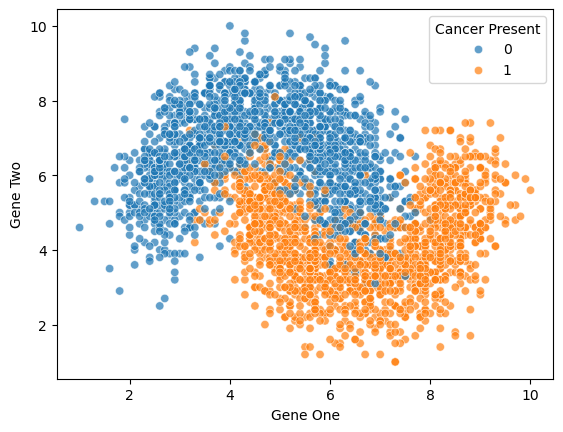

In [12]:
sns.scatterplot(data=df , x='Gene One' , y='Gene Two' , hue='Cancer Present',alpha=.7)

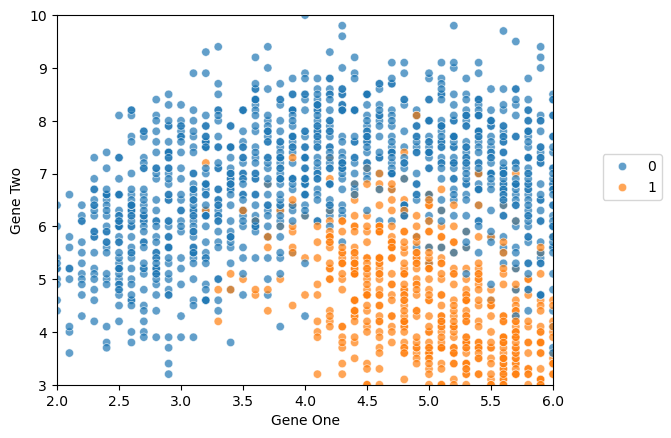

In [13]:
sns.scatterplot(data=df , x='Gene One' , y='Gene Two' , hue='Cancer Present',alpha=.7)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,.5))

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
scaler =StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
len(df)

3000

### Understanding test set

In [19]:
full_test = pd.concat([x_test,y_test],axis=1)

In [20]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

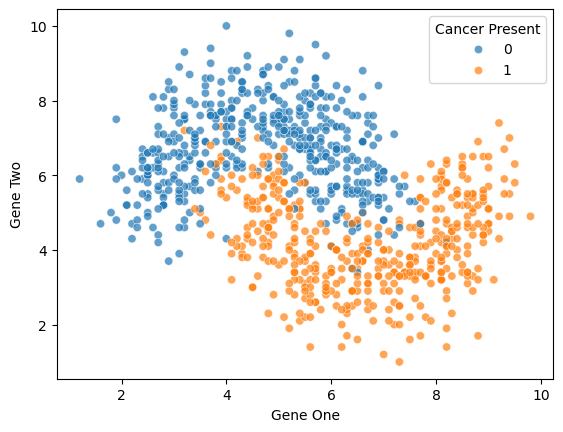

In [21]:
sns.scatterplot(data=full_test , x='Gene One' , y='Gene Two' , hue='Cancer Present',alpha=.7)

In [22]:
y_pred = knn_model.predict(scaled_x_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.9011111111111111

In [25]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [27]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    
    y_pred = knn_model.predict(scaled_x_test)
    
    test_error = 1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

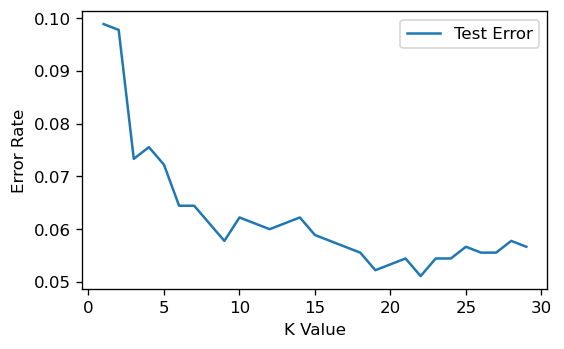

In [35]:
plt.figure(figsize=(5,3),dpi=120)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [36]:
scaler = StandardScaler()

In [37]:
knn = KNeighborsClassifier()

In [38]:
operations = [('scaler',scaler) , ('knn',knn)]

In [39]:
from sklearn.pipeline import Pipeline

In [41]:
pipe = Pipeline(operations)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
k_val = list(range(1,20))
k_val

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [44]:
param_grid = {'knn__n_neighbors' : k_val} 

In [46]:
cv_classi = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [47]:
cv_classi.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [48]:
cv_classi.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=16))])

In [49]:
cv_classi.cv_results_['mean_test_score']

array([0.90380952, 0.90714286, 0.92142857, 0.91380952, 0.92380952,
       0.92047619, 0.92761905, 0.9252381 , 0.9247619 , 0.92285714,
       0.9252381 , 0.92428571, 0.92761905, 0.92809524, 0.92857143,
       0.93      , 0.92904762, 0.92857143, 0.92761905])

In [51]:
cv_classi.best_params_

{'knn__n_neighbors': 16}

In [53]:
scaler = StandardScaler()
knn_final = KNeighborsClassifier(n_neighbors=16)

In [54]:
operations = [('scaler',scaler) , ('knn_final', knn_final)]
pipe = Pipeline(operations)

In [55]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_final', KNeighborsClassifier(n_neighbors=16))])

In [56]:
pipe_pred = pipe.predict(x_test)

In [57]:
sample = x_test.iloc[40]
sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [58]:
pipe.predict(sample.values.reshape(1,-1))

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [63]:
pipe.predict_proba(x_test)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.25, 0.75],
       [1.  , 0.  ]])

In [64]:
pipe.predict_proba(sample.values.reshape(1,-1))

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.9375, 0.0625]])